In [1]:
# Esse notebook tem o intuito de sanar os quetionamento levantados no desafio proposto pela empresa Seazone
# Os dados necessários para a resolução desse desafio foram proporcionados pela empresa

In [2]:
# Importação da biblioteca pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Carregando a base de dados e tendo o primeiro contato com o formato dos dois arquivos
base1 = pd.read_csv('desafio_details.csv')
base2 = pd.read_csv('desafio_priceav.csv')
base1

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0
...,...,...,...,...,...,...,...,...,...
4686,4686,34392248,Ingleses,Lindo e acogedor apto en zona norte de la Isla,2.0,2.0,NaN,False,0.0
4687,4687,44538969,Canasvieiras,"Ótimo apto no centro de Canas, a 450m do mar",1.0,1.0,NaN,False,0.0
4688,4688,16609826,Jurerê,Agradável Apartamento em Jurerê Internacional,3.0,2.0,5.0,True,30.0
4689,4689,31239515,Canasvieiras,Cobertura no centro 3 dormitorios com AR.,3.0,2.0,NaN,True,2.0


In [4]:
# Visualizando a segunda base de dados
base2

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0
...,...,...,...,...,...,...,...
354515,64596,4298115,40199361,blank,2021-03-26,200.0,0
354516,64597,4298116,40199361,blank,2021-03-27,200.0,0
354517,64598,4298117,40199361,2020-09-14 00:00:00,2021-03-28,250.0,1
354518,64599,4298118,40199361,2020-09-14 00:00:00,2021-03-29,250.0,1


In [5]:
# A partir de uma primeira análise dos dados, já foi possível concluir que algumas colunas são desnessárias
# Unnamed:0, Unnamed:0, Unnamed:1
# Também cheguei a conclusão que unir as duas tabelas possivelmente facilitaria uma melhor compreensão dos dados

In [6]:
# Excluindo as tabelas desnecessárias e unindo os dois datasets em um só
base1_Drop = base1.drop(columns=["Unnamed: 0"])
base2_Drop = base2.drop(columns=["Unnamed: 0","Unnamed: 0.1",])
base_merged = pd.merge(base1_Drop, base2_Drop, on="airbnb_listing_id")
base_merged

,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,booked_on,date,price_string,occupied
0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,2020-12-04 00:00:00,2020-12-04,270.0,1
1,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,2020-12-04 00:00:00,2020-12-05,270.0,1
2,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,2020-12-04 00:00:00,2020-12-06,270.0,1
3,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,2020-12-04 00:00:00,2020-12-07,270.0,1
4,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,2020-12-04 00:00:00,2020-12-08,270.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
354515,40277915,Ingleses,2 dormitório a 100 metros do mar (202B),2.0,2.0,NaN,False,0.0,2021-02-28 00:00:00,2021-03-26,150.0,1
354516,40277915,Ingleses,2 dormitório a 100 metros do mar (202B),2.0,2.0,NaN,False,0.0,2021-02-28 00:00:00,2021-03-27,150.0,1
354517,40277915,Ingleses,2 dormitório a 100 metros do mar (202B),2.0,2.0,NaN,False,0.0,2021-02-28 00:00:00,2021-03-28,150.0,1
354518,40277915,Ingleses,2 dormitório a 100 metros do mar (202B),2.0,2.0,NaN,False,0.0,2021-02-28 00:00:00,2021-03-29,150.0,1


In [7]:
# Visualização das instancias nulas no Dataset
base_merged.isnull().sum()
# Devido a grande quantidade de valores nulos, achei melhor tratá-los separadamente em cada análise específica

airbnb_listing_id           0
suburb                      0
ad_name                     0
number_of_bedrooms      15612
number_of_bathrooms        74
star_rating            136991
is_superhost                0
number_of_reviews         427
booked_on                   0
date                        0
price_string                0
occupied                    0
dtype: int64

In [8]:
# Para realizar o primeiro ordenamento foi apenas necessário agrupar os dados pelo atributo "suburb" e depois ordena-los por "airbnb_listing_id"
suburbByListing = base_merged.groupby(['suburb']).count()
suburbByListing = suburbByListing.sort_values(by=['airbnb_listing_id'], ascending=False)
suburbByListing['airbnb_listing_id']

suburb
Ingleses              176864
Canasvieiras           92186
Jurerê                 42857
Lagoa da Conceição     23431
Centro                 19182
Name: airbnb_listing_id, dtype: int64

In [9]:
# Para realizar o segundo ordenamento, levei em consideração somente os "listing" que foram alugados, pois foram os únicos  que geraram receita.
# Criei um novo dataset somente com os "listing" ocupados, agrupei pelos bairros e calculei a média dos valores do anúncio. Depois só ordenei por esses valores.
base_occupied = base_merged[base_merged['occupied'] == 1].copy()
suburbByRevenue = base_occupied.groupby(by=['suburb']).mean('price_string')
suburbByRevenue = suburbByRevenue.sort_values(by=['price_string'], ascending=False)
suburbByRevenue['price_string']
# Nota-se que apesar do bairro Jurerê ser apenas o terceiro em questão de anúncios, ele é o que mais gera receita.
# O restante dos bairros segue uma tendência de receita em relação ao número de anúncios.

suburb
Jurerê                414.080865
Ingleses              355.183420
Canasvieiras          292.236096
Lagoa da Conceição    234.387587
Centro                206.894422
Name: price_string, dtype: float64

In [10]:
# Para responder o terceiro questionamento, achei que seria interessante analisar os fatores mais obvios com relação ao faturamento.
# SuperHost influência no faturamento dos anúncios ?
# Número de avaliações ?
# Número de quartos ?

In [11]:
# A primeira análise será feita com relação ao atributo superHost.
# Novamente levei em consideração somente os anúncios que foram ocupados. 
# Como é bem comum que um mesmo anúncio possua diversas datas alugadas, agrupei esses dados pelo "airbnb_listing_id" e calculei a média desse faturamento.
# Depois agrupei os dados resultantes pelo atributo "is_superhost" e novamente calculei a média do faturamento.
base_pricingById = base_occupied.groupby(by=['airbnb_listing_id']).mean('price_string')
isSuperHost = base_pricingById.groupby(by=['is_superhost']).mean('price_string')
isSuperHost['price_string']

is_superhost
0.0    363.857518
1.0    310.641070
Name: price_string, dtype: float64

Text(0.5, 1.0, 'Faturamento x SuperHost')

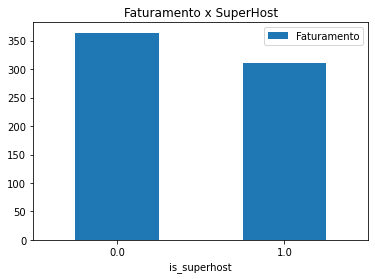

In [12]:
# Nessa análise foi possível verificar que ao contrário do que se esperava, os anúncios que não são superHost tiveram um faturamento superior.
index = isSuperHost.index
df = pd.DataFrame({'Faturamento': isSuperHost['price_string']}, index=index)
df.plot.bar(rot=0).set_title('Faturamento x SuperHost')

In [13]:
# A segunda análise vai ser feita com relação ao número de avaliações do anúncio.
# Para essa análise atribuí o valor zero para os atributos nulos.
# Novamente levando em consideração somente os anúncios ocupados e calculando a média de faturamento de cada anúncio.
# Posteriormente agrupando pelo número de avaliações e calculando a média de faturamento.
avaliations = base_occupied
avaliations['number_of_reviews'].fillna(0,inplace=True)
avaliations = avaliations.groupby(by=['airbnb_listing_id']).mean('price_string')
avaliations = avaliations.groupby(by=['number_of_reviews']).mean('price_string')
avaliations

,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,price_string,occupied
number_of_reviews,,,,,,
0.0,1.783708,1.520325,1.000000,0.063686,386.736804,1.0
1.0,1.858586,1.562189,5.000000,0.111940,379.282583,1.0
2.0,1.736842,1.481132,5.000000,0.136150,358.558530,1.0
3.0,1.809783,1.526042,4.692708,0.151042,365.583475,1.0
4.0,1.939394,1.604478,4.853383,0.208955,366.558494,1.0
...,...,...,...,...,...,...
163.0,3.000000,3.000000,5.000000,1.000000,317.207207,1.0
188.0,1.000000,1.000000,5.000000,0.000000,164.413793,1.0
205.0,1.000000,1.000000,5.000000,1.000000,89.411765,1.0


Text(0, 0.5, 'Faturamento')

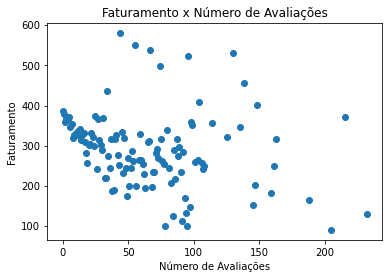

In [14]:
# Considerei que um gráfico de dispersão seria o ideal para fazer essa análise.
# A maioria dos dados está concentrada na área com menos avaliações, com algumas instâncias dispersas pelo gráfico.
# Apesar dessa tendência, o faturamento dos anúncios com até 100 avaliações também deve ser levado em consideração.
avaliations['number_of_reviews'] = avaliations.index
plt.scatter(avaliations.number_of_reviews, avaliations.price_string)
plt.title('Faturamento x Número de Avaliações')
plt.xlabel('Número de Avaliações')
plt.ylabel('Faturamento')

In [15]:
# A terceira análise será com relação ao número de quartos.
# Para essa análise, por não ter certeza que valor atribuir as instâncias nulas, achei melhor excluir esses valores.
# Novamente levando em consideração somente os anúncios ocupados e calculando a média de faturamento de cada anúncio.
# Posteriormente agrupando pelo número de quartos e calculando a média de faturamento.
bedrooms = base_occupied
bedrooms['number_of_bedrooms'].dropna()
bedrooms = bedrooms.groupby(by=['airbnb_listing_id']).mean('price_string')
bedrooms = bedrooms.groupby(by=['number_of_bedrooms']).mean('price_string')
bedrooms

,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,price_string,occupied
number_of_bedrooms,,,,,,
1.0,1.016906,4.817227,0.322908,13.519865,268.331419,1.0
2.0,1.698047,4.862644,0.206416,8.703626,368.672285,1.0
3.0,2.227723,4.813043,0.188119,9.096535,529.016991,1.0
4.0,3.292683,4.888889,0.219512,8.853659,614.543750,1.0
5.0,3.000000,2.500000,0.666667,12.666667,622.865129,1.0


Text(0, 0.5, 'Faturamento')

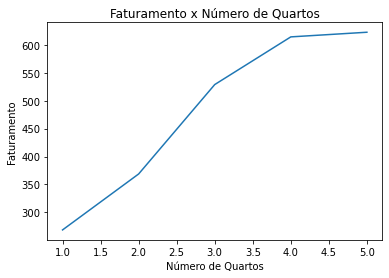

In [16]:
# Os dados seguem uma tendência obvia nesse quesito. Quanto mais quartos o anúncio possui, maior o seu faturamento.
# Pode-se considerar que esses dados se devem ao tamanho do imóvel e sua qualidade, 
bedrooms['number_of_bedrooms'] = bedrooms.index
plt.plot(bedrooms.number_of_bedrooms, bedrooms.price_string)
plt.title('Faturamento x Número de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Faturamento')

In [17]:
# A última análise será com relação ao número de estrelas de cada anúncio.
# Para essa análise, achei que seria interessante avaliar os anúncios que não possuíam essa avaliação, portanto atribui valor -1 as instâncias nulas.
# Novamente levando em consideração somente os anúncios ocupados e calculando a média de faturamento de cada anúncio.
# Posteriormente agrupando pelo número de estrelas e calculando a média de faturamento.
stars = base_occupied
stars['star_rating'].fillna(-1,inplace=True)
stars = stars.groupby(by=['airbnb_listing_id']).mean('price_string')
stars = stars.groupby(by=['star_rating']).mean('price_string')
stars

,number_of_bedrooms,number_of_bathrooms,is_superhost,number_of_reviews,price_string,occupied
star_rating,,,,,,
-1.0,1.798934,1.525964,0.089696,0.624907,380.484437,1.0
0.0,2.285714,1.857143,0.000000,1.285714,363.512489,1.0
3.0,2.000000,2.000000,0.000000,3.000000,517.450980,1.0
3.5,1.700000,1.200000,0.100000,4.000000,285.754258,1.0
4.0,1.543478,1.347826,0.000000,10.586957,283.528137,1.0
4.5,1.729443,1.472362,0.155779,14.600503,309.089944,1.0
5.0,1.770992,1.506182,0.451636,20.208000,335.275665,1.0


Text(0.5, 1.0, 'Faturamento x Classificação')

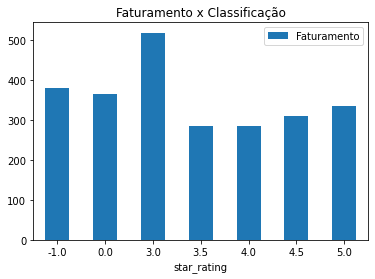

In [18]:
# Essa análise segue uma tendência contrária do esperado, pois os anúncios com classificações piores geram mais receita do que os melhor classificados.
# Vale ressaltar que os anúncios com classificação 3 se mostraram consideravelmente mais rentáveis que os demais. Uma análise mais aprofundada desse fator seria recomendado.
index = stars.index
df2 = pd.DataFrame({'Faturamento': stars['price_string']}, index=index)
df2.plot.bar(rot=0).set_title('Faturamento x Classificação')

In [19]:
# Para responder a última pergunta fiz uma cópia do dataset com somente os valores que serão avaliados.
# Tratei as duas colunas referente a datas para que fosse possível fazer comparações entre seus valores.
datas = base_occupied[['airbnb_listing_id', 'booked_on', 'date']].copy()
datas['booked_on'] = pd.to_datetime(datas['booked_on'], format='%Y/%m/%d')
datas['date'] = pd.to_datetime(datas['date'], format='%Y/%m/%d')
datas

,airbnb_listing_id,booked_on,date
0,31389869,2020-12-04,2020-12-04
1,31389869,2020-12-04,2020-12-05
2,31389869,2020-12-04,2020-12-06
3,31389869,2020-12-04,2020-12-07
4,31389869,2020-12-04,2020-12-08
...,...,...,...
354515,40277915,2021-02-28,2021-03-26
354516,40277915,2021-02-28,2021-03-27
354517,40277915,2021-02-28,2021-03-28
354518,40277915,2021-02-28,2021-03-29


In [20]:
# Para cacular a antecedência média das reservas, subtrai a data da locação pela data na qual o anúncio foi reservado.
# Para isso criei uma função que faz essa subtração, e a apliquei após fazer o agrupamento dos dados pelo Id do anúncio.
# Atribui esse valor a uma nova lista e calculei sua média.
def dataDif(datas):
    return datas['date'] - datas['booked_on']
lista_antecedencia = datas.sort_values(by=['airbnb_listing_id']).groupby("airbnb_listing_id").apply(dataDif)
media_antecedencia = lista_antecedencia.median()
media_antecedencia
# A média de antecedência das reservas é de 11 dias.

Timedelta('11 days 00:00:00')

In [21]:
# Para verificar se os anúncios no fim de semana são reservados com mais ou menos antecedência, criei uma nova coluna com os valores da função "dayofweek" a partir data da locação.
datas['diaDaSemana'] = datas['date'].dt.dayofweek
datas

,airbnb_listing_id,booked_on,date,diaDaSemana
0,31389869,2020-12-04,2020-12-04,4
1,31389869,2020-12-04,2020-12-05,5
2,31389869,2020-12-04,2020-12-06,6
3,31389869,2020-12-04,2020-12-07,0
4,31389869,2020-12-04,2020-12-08,1
...,...,...,...,...
354515,40277915,2021-02-28,2021-03-26,4
354516,40277915,2021-02-28,2021-03-27,5
354517,40277915,2021-02-28,2021-03-28,6
354518,40277915,2021-02-28,2021-03-29,0


In [22]:
# A função "dayofweek" atribui um valor de 0 a 6 a partir da data referente ao atributo.
# Criei um novo dataset com somente os valores de 5 e 6, que são os referentes ao sábado e ao domingo.
datas_fds = datas.loc[datas['diaDaSemana'] >= 5]
datas_fds

,airbnb_listing_id,booked_on,date,diaDaSemana
1,31389869,2020-12-04,2020-12-05,5
2,31389869,2020-12-04,2020-12-06,6
8,31389869,2020-12-11,2020-12-12,5
9,31389869,2020-12-11,2020-12-13,6
29,31389869,2021-01-01,2021-01-02,5
...,...,...,...,...
354503,40277915,2021-03-14,2021-03-14,6
354509,40277915,2021-03-20,2021-03-20,5
354510,40277915,2021-03-21,2021-03-21,6
354516,40277915,2021-02-28,2021-03-27,5


In [23]:
# Após esse tratamento simplesmente apliquei o mesmo processo feito anteriormente.
lista_antecedencia_fds = datas_fds.sort_values(by=['airbnb_listing_id']).groupby("airbnb_listing_id").apply(dataDif)
media_antecedencia_fds = lista_antecedencia_fds.median()
media_antecedencia_fds

Timedelta('11 days 00:00:00')

In [24]:
# A partir dessa análise foi possível verificar que a média de antecedência das reservas no fim de semana é a mesma dos dias da semana, 11 dias.